-- Epoch 1
Norm: 0.98, NNZs: 21, Bias: -2.396034, T: 202944, Avg. loss: 0.328010
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 21, Bias: -2.395556, T: 405888, Avg. loss: 0.321406
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 21, Bias: -2.381602, T: 608832, Avg. loss: 0.321430
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 21, Bias: -2.380382, T: 811776, Avg. loss: 0.321441
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 21, Bias: -2.416291, T: 1014720, Avg. loss: 0.321489
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 0.97, NNZs: 21, Bias: -2.420225, T: 1217664, Avg. loss: 0.321412
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 0.98, NNZs: 21, Bias: -2.443008, T: 1420608, Avg. loss: 0.321419
Total training time: 0.26 seconds.
Convergence after 7 epochs took 0.26 seconds



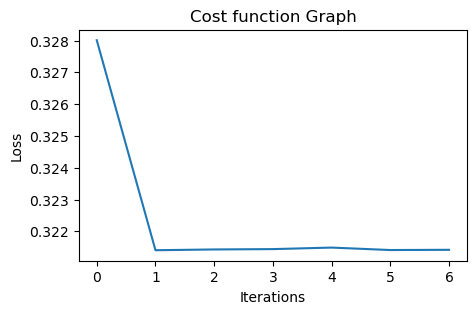

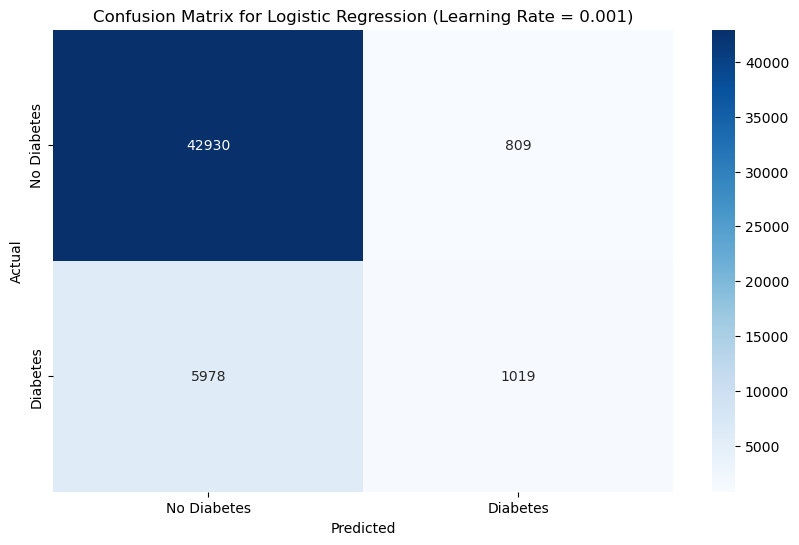

Classification Report for Logistic Regression (Learning Rate = 0.001):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.56      0.15      0.23      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.83      0.87      0.83     50736

Specificity:         98.2 

Sensitivity:         14.6 (Recall)
-- Epoch 1
Norm: 0.95, NNZs: 21, Bias: -2.484381, T: 202944, Avg. loss: 0.328356
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 21, Bias: -2.327856, T: 405888, Avg. loss: 0.327623
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 21, Bias: -2.371250, T: 608832, Avg. loss: 0.327479
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 21, Bias: -2.400956, T: 811776, Avg. loss: 0.327597
Total training time: 0.14 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 21, Bias: -2.458253, T: 1014720, Avg. loss: 0.

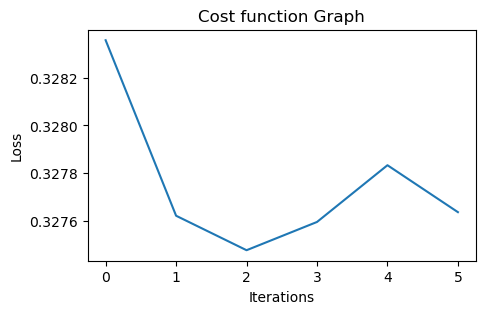

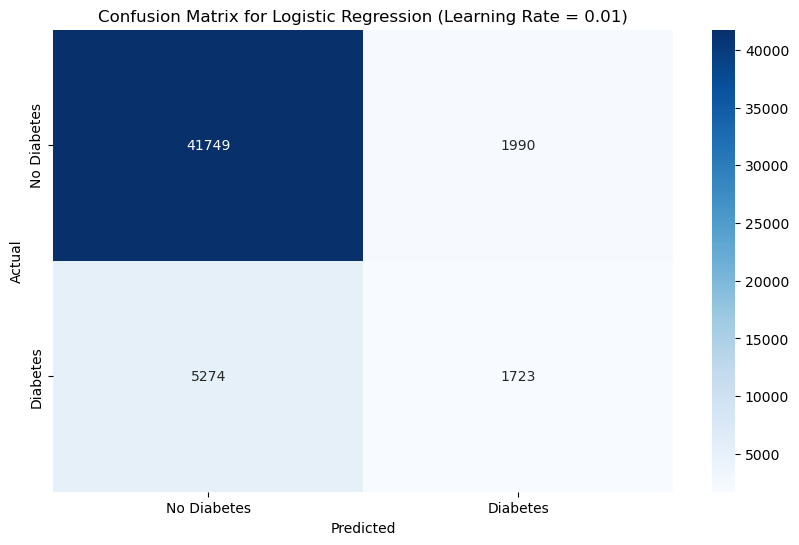

Classification Report for Logistic Regression (Learning Rate = 0.01):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     43739
           1       0.46      0.25      0.32      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.60      0.62     50736
weighted avg       0.83      0.86      0.84     50736

Specificity:         95.5 

Sensitivity:         24.6 (Recall)
-- Epoch 1
Norm: 1.64, NNZs: 21, Bias: -2.902449, T: 202944, Avg. loss: 0.420616
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 2.58, NNZs: 21, Bias: -2.551196, T: 405888, Avg. loss: 0.419818
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1.90, NNZs: 21, Bias: -2.991707, T: 608832, Avg. loss: 0.419864
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 1.63, NNZs: 21, Bias: -2.825959, T: 811776, Avg. loss: 0.419547
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.72, NNZs: 21, Bias: -2.830823, T: 1014720, Avg. loss: 0.4

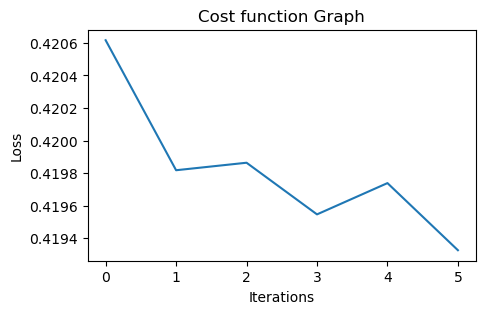

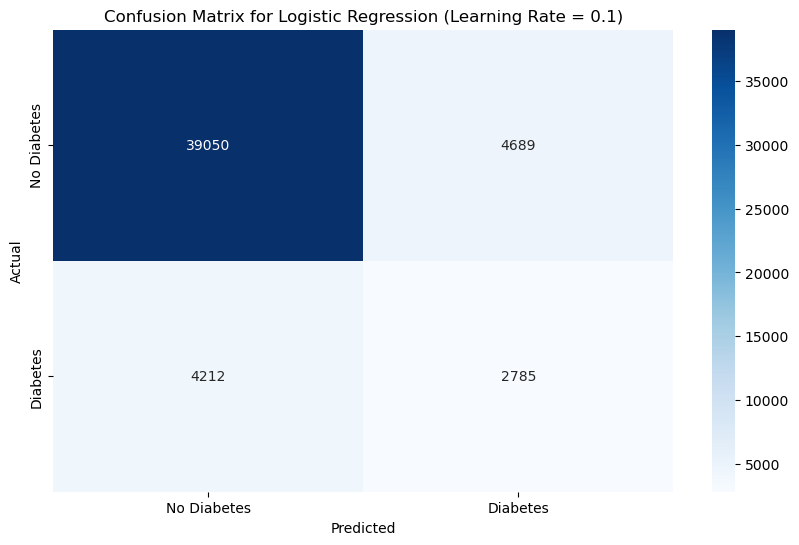

Classification Report for Logistic Regression (Learning Rate = 0.1):
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     43739
           1       0.37      0.40      0.38      6997

    accuracy                           0.82     50736
   macro avg       0.64      0.65      0.64     50736
weighted avg       0.83      0.82      0.83     50736

Specificity:         89.3 

Sensitivity:         39.800000000000004 (Recall)


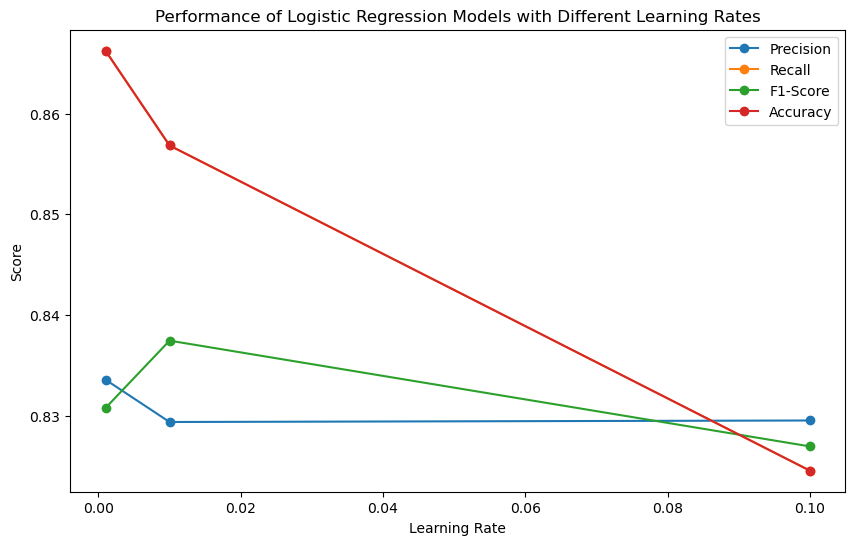

In [29]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import scipy 
from scipy import stats 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo 
import sys 
from io import StringIO
import seaborn as sns

def standardize_data(data):
    data_standardized = data.copy()
    names = data.columns
    for name in names:
        data_standardized[name] = stats.zscore(data[name])
    return data_standardized

# Fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

X = standardize_data(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression models with different learning rates
learning_rates = [0.001, 0.01, 0.1]
log_reg_models = []
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for lr in learning_rates:
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    logr = SGDClassifier(loss='log_loss',learning_rate='constant',eta0=lr,max_iter=1000,random_state=42,verbose=3)
    log_reg_models.append(logr)
    logr.fit(X_train, np.ravel(y_train,order='C'))#y_resampled_smote)
    sys.stdout = old_stdout
    loss_history = mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
        print(line)
        if(len(line.split("loss: ")) == 1):
            continue
        loss_list.append(float(line.split("loss: ")[-1]))
        
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title('Cost function Graph')
    plt.rcParams["figure.figsize"] = (5,3)

    y_pred = logr.predict(X_test)

    #metrics['accuracy'].append(logr.score(X_test, y_test))
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted'))

    # Plot confusion matrix for each learning rate
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix for Logistic Regression (Learning Rate = {lr})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report for each learning rate
    print(f'Classification Report for Logistic Regression (Learning Rate = {lr}):\n{classification_report(y_test, y_pred)}')
    TN, FP    = cm[0, 0], cm[0, 1]
    FN, TP    = cm[1, 0], cm[1, 1]
    
    print('Specificity:        ',  round(TN / float(TN + FP),3)*100, "\n")
    print('Sensitivity:        ',  round(TP / float(TP + FN),3)*100, "(Recall)")
    
# Plot the metrics of Logistic Regression models in a single graph
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, metrics['precision'], marker='o', label='Precision')
plt.plot(learning_rates, metrics['recall'], marker='o', label='Recall')
plt.plot(learning_rates, metrics['f1'], marker='o', label='F1-Score')
plt.plot(learning_rates, metrics['accuracy'], marker='o', label='Accuracy')

plt.title("Performance of Logistic Regression Models with Different Learning Rates")
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.legend()
plt.show()